In [1]:
import pandas as pd

flows = pd.read_csv("山梨4地点流量と全窒素.tsv", sep="\t")
cols = list(flows.columns)
cols = {col:eval(col) for col in cols[2:]}
cols["Unnamed: 0"] = "month"
flows = flows.rename(columns= cols)
flows

,month,year,"(富士見橋, 採取月日)","(富士見橋, 流量)","(富士見橋, 全窒素)","(大月橋, 採取月日)","(大月橋, 流量)","(大月橋, 全窒素)","(桂川橋, 採取月日)","(桂川橋, 流量)","(桂川橋, 全窒素)","(昭和橋, 採取月日)","(昭和橋, 流量)","(昭和橋, 全窒素)"
0,4,2000,4/91,2.9300,1.20,4/91,2.0700,1.7,4/42,32.3200,1.6,4/91,1.0200,1.60
1,5,2000,5/01,2.6200,1.20,5/01,5.5200,1.6,5/11,39.1000,1.5,5/01,0.9700,1.30
2,6,2000,6/7,2.3800,1.20,6/7,2.3100,1.6,6/8,48.7000,1.5,6/7,0.5700,1.50
3,7,2000,7/5,3.8500,1.30,7/5,5.3000,1.7,7/6,41.0000,1.5,7/5,1.3400,1.40
4,8,2000,8/2,4.3100,1.10,8/2,4.8000,1.4,8/3,43.9800,1.3,8/2,5.1800,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,11,2021,11月04日,4.0583,0.88,11月04日,2.3989,1.0,11月04日,21.8207,1.2,11月04日,3.0170,0.97
260,12,2021,12月02日,4.3601,0.98,12月02日,1.9112,1.1,12月02日,28.8416,1.1,12月02日,1.5534,1.00
261,1,2022,01月06日,4.1651,0.94,01月06日,2.2199,1.1,01月06日,21.9764,1.3,01月06日,1.8149,1.00
262,2,2022,02月03日,4.2875,0.88,02月03日,1.7425,1.1,02月03日,22.7037,1.2,02月03日,1.0389,1.10


月ごとの流量変化。多少周期性はあるようにも思える。それより、下流での水量が上流より減っている場合があるのが気になる。川茂発電所の取水のせいかもしれないし、測定日のずれによるものかもしれない。

時刻0は2000年4月。

/Users/matto/Library/CloudStorage/GoogleDrive-vitroid@gmail.com/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/.venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 26157 (\N{CJK UNIFIED IDEOGRAPH-662D}) missing from current font.
  func(*args, **kwargs)
/Users/matto/Library/CloudStorage/GoogleDrive-vitroid@gmail.com/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/.venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from current font.
  func(*args, **kwargs)
/Users/matto/Library/CloudStorage/GoogleDrive-vitroid@gmail.com/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/.venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 27211 (\N{CJK UNIFIED IDEOGRAPH-6A4B}) missing from current font.
  func(*args, **kwargs)
/Users/matto/Library/CloudStorage/GoogleDrive-vitroid@gmail.com/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/.venv/lib/python3.11/si

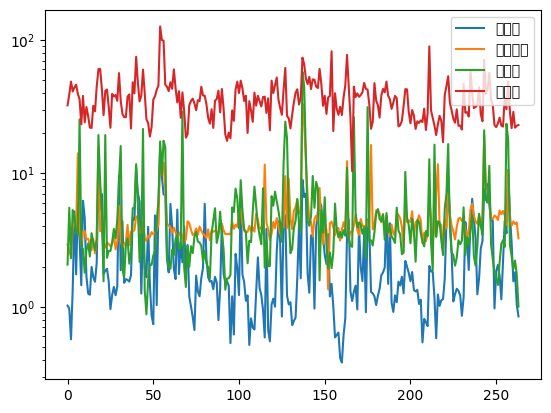

In [3]:
import matplotlib.pyplot as plt

bridges = {
    "昭和橋": (35.49653, 138.80937),
    "富士見橋": (35.52293, 138.84808),  # 35.52293、138.84808
    "大月橋": (35.60887308, 138.93663348),
    "桂川橋": (35.6167306, 139.1171345),  #
    # "境川橋": (35.61726232577428, 139.13838232748358),  #
}
for bridge in bridges:
    plt.plot(flows[(bridge, "流量")],label=bridge)
plt.yscale("log")
plt.legend()

月ごとの流量。夏に増え、冬に減るゆるいトレンドがある? 周期的なものとして、フーリエ変換してみるか。

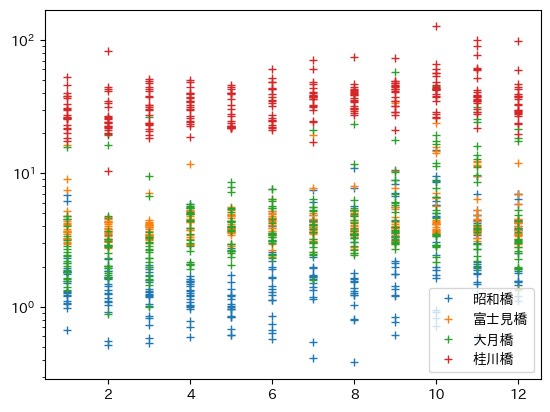

In [35]:
for bridge in bridges:
    plt.plot(flows["month"], flows[(bridge, "流量")], "+",label=bridge)
plt.yscale("log")
plt.legend()

22年分のデータをフーリエ変換し、パワースペクトルを作成。22回の周期が明確。年周変化がある。

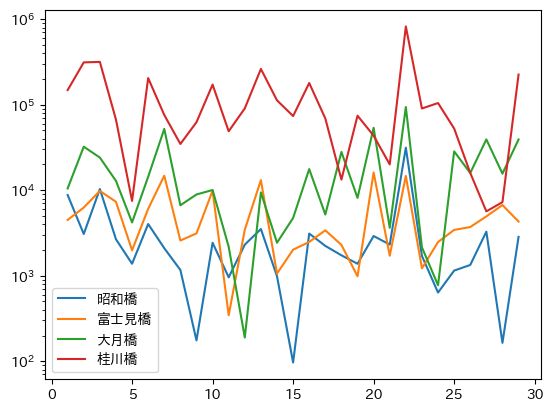

In [51]:
import numpy as np

# 時刻0が4月に対応することに注意。

for bridge in bridges:
    power_spectrum = abs(np.fft.fft(flows[(bridge, "流量")]))**2
    plt.plot(range(1,30), power_spectrum[1:30], label=bridge)

plt.yscale("log")
plt.legend()


直線的に増減するトレンドと、12ヵ月周期で正弦的に変化する年周変化を仮定し、22年分の変動をフィッティングする。

https://qiita.com/maskot1977/items/e4f5f71200180865986e

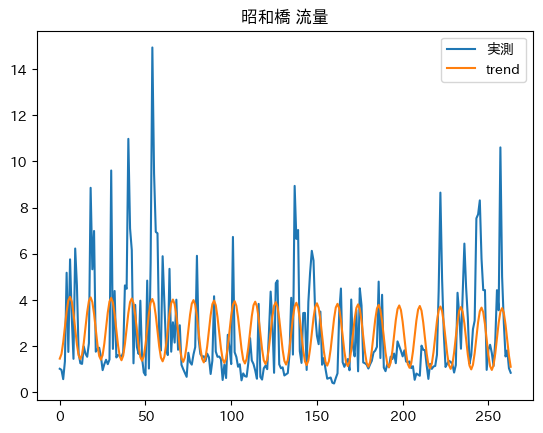

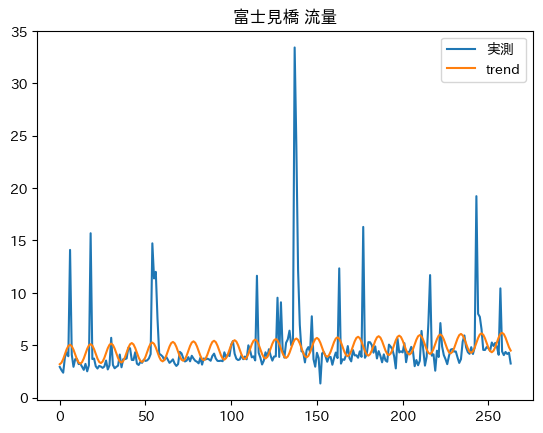

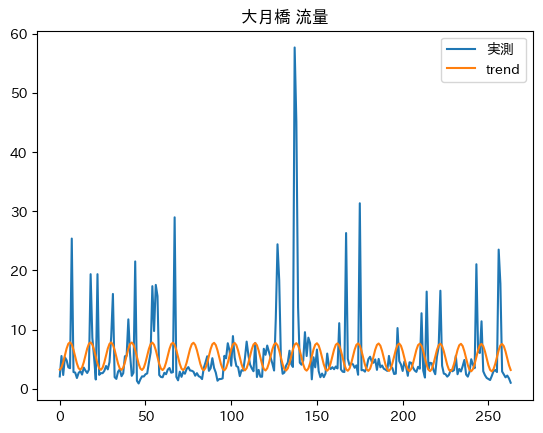

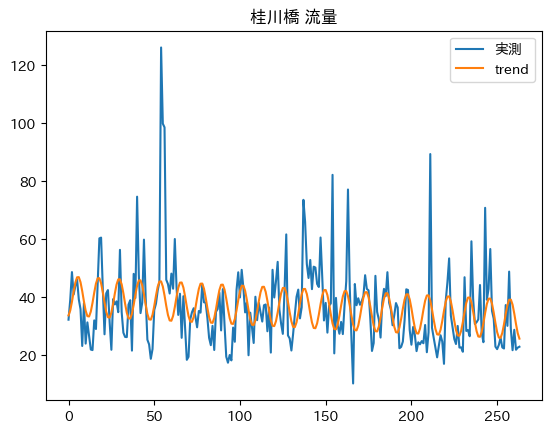

In [70]:
import scipy

# フィッティングに用いる関数。直線と周期の和。
def trend(x, intercept, gradient, amp_cos, amp_sin):
    return intercept + gradient*x + amp_cos*np.cos(x*2*np.pi/12) + amp_sin*np.sin(x*2*np.pi/12)

for bridge in bridges:
    months = np.arange(12*22)
    popt, pcov = scipy.optimize.curve_fit(trend, months, flows[(bridge, "流量")],)

    plt.plot(flows[(bridge, "流量")], label="実測")
    plt.plot(trend(months, *popt), label="trend")    
    plt.title(f"{bridge} 流量")
    plt.legend()
    plt.show()


同じ手法で、全窒素総量(全窒素濃度×流量)の傾向をプロットする。

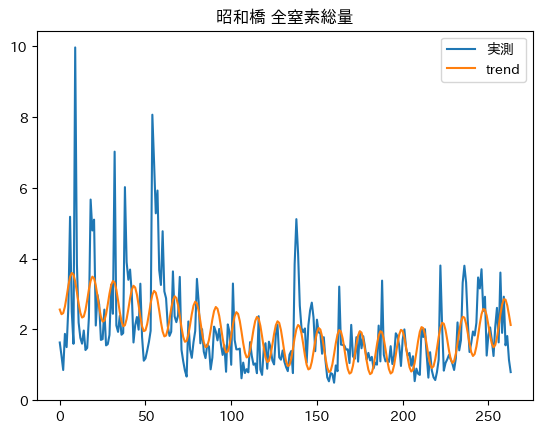

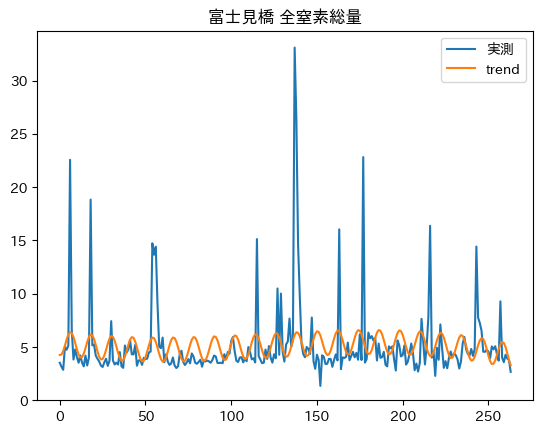

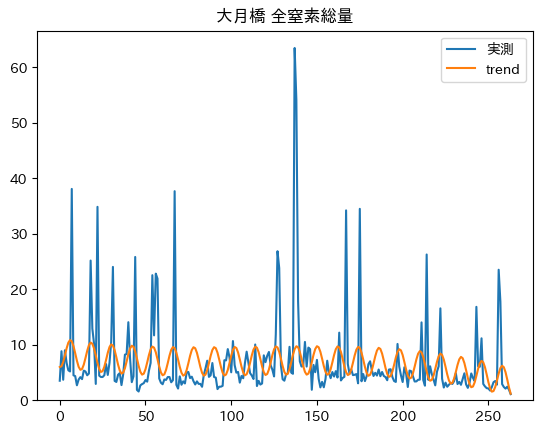

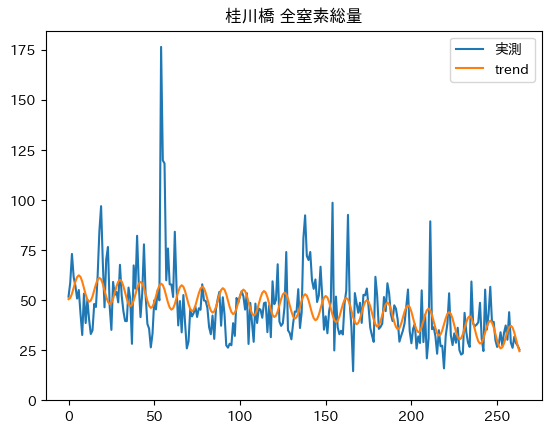

In [77]:
import scipy


def trend(x, intercept, gradient, g2, g3, amp_cos, amp_sin):
    return (
        intercept
        + gradient * x
        + g2 * x**2
        + g3 * x**3
        + amp_cos * np.cos(x * 2 * np.pi / 12)
        + amp_sin * np.sin(x * 2 * np.pi / 12)
    )


for bridge in bridges:
    months = np.arange(12 * 22)
    popt, pcov = scipy.optimize.curve_fit(
        trend,
        months,
        flows[(bridge, "流量")] * flows[(bridge, "全窒素")],
    )

    plt.plot(flows[(bridge, "流量")] * flows[(bridge, "全窒素")], label="実測")
    plt.plot(trend(months, *popt), label="trend")
    plt.title(f"{bridge} 全窒素総量")
    plt.legend()
    plt.ylim(0,None)
    plt.show()

確認のため、窒素濃度のトレンドも見ておく。線形トレンドだけでなく三次多項式にしてみる。

昭和橋(最上流)では、濃度変化はかなりはっきりした周期性を示している。

よく見ると、調和橋での流量の周期変動と濃度の周期変動は位相が逆になっている。つまり、流量が増えると窒素が薄まることを意味している。全窒素総量はそれらがキャンセルし、やや変動は小さくなっている。

位相が逆であることを相関図で示す。

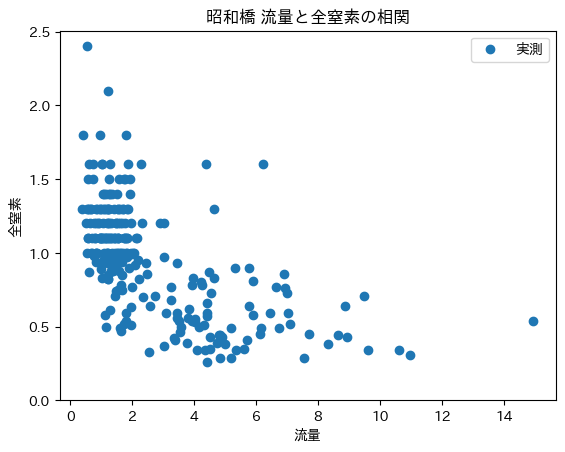

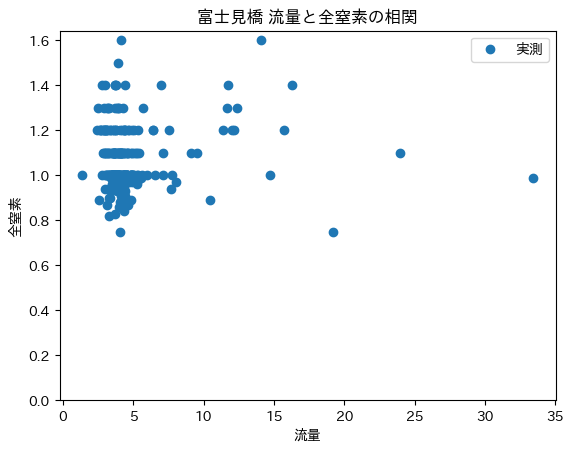

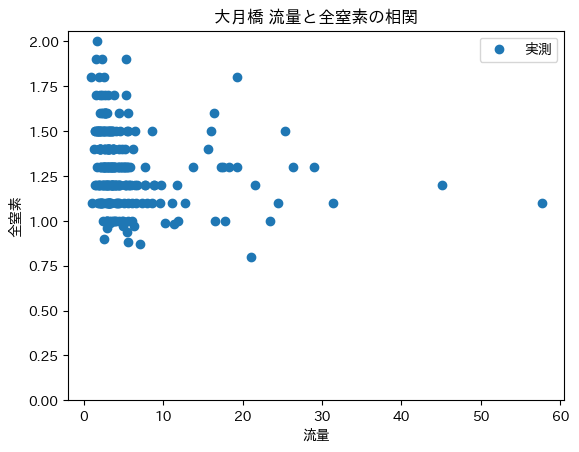

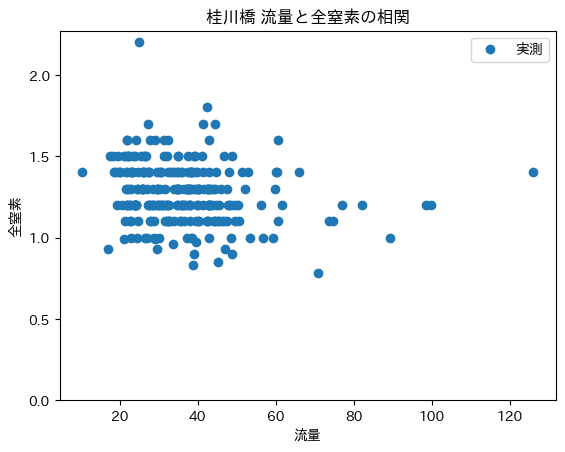

In [8]:
import japanize_matplotlib

for bridge in bridges:
    plt.plot(flows[(bridge, "流量")], flows[(bridge, "全窒素")], "o", label="実測")
    plt.title(f"{bridge} 流量と全窒素の相関")
    plt.legend()
    plt.ylim(0,None)
    plt.xlabel("流量")
    plt.ylabel("全窒素")
    plt.show()

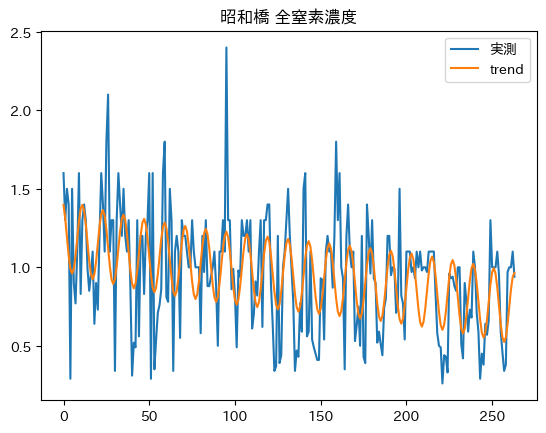

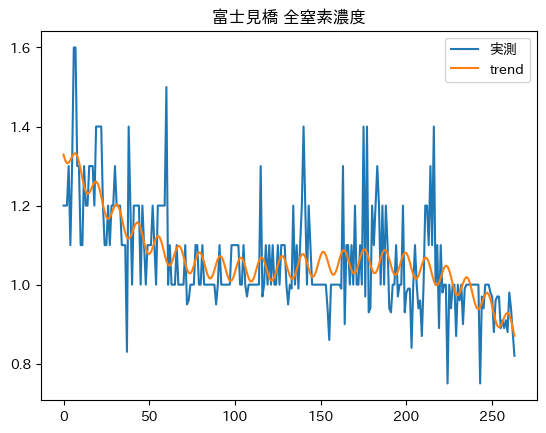

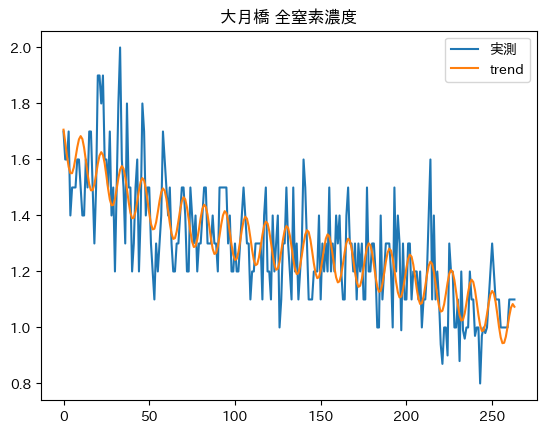

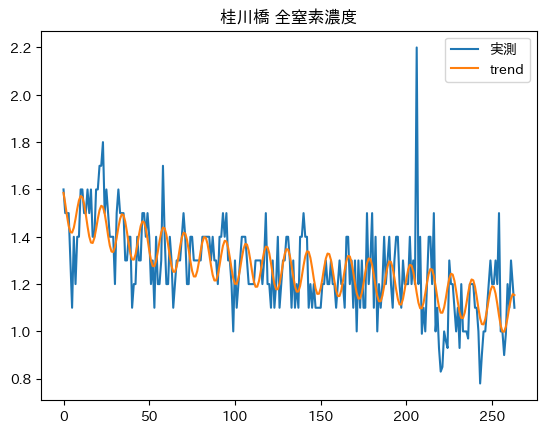

In [75]:
import scipy


def trend(x, intercept, gradient, g2, g3, amp_cos, amp_sin):
    return (
        intercept
        + gradient * x
        + g2 * x**2
        + g3 * x**3
        + amp_cos * np.cos(x * 2 * np.pi / 12)
        + amp_sin * np.sin(x * 2 * np.pi / 12)
    )


for bridge in bridges:
    months = np.arange(12 * 22)
    popt, pcov = scipy.optimize.curve_fit(
        trend,
        months,
        flows[(bridge, "全窒素")],
    )

    plt.plot(flows[(bridge, "全窒素")], label="実測")
    plt.plot(trend(months, *popt), label="trend")
    plt.title(f"{bridge} 全窒素濃度")
    plt.legend()
    plt.show()

`air`での解析のために、2009年4月以降の情報を出力する。

In [12]:
import pickle

columns = [(bridge, elem) for bridge in bridges for elem in ("流量","全窒素")]

subdf = flows.iloc[9*12:21*12][columns]

subdf.to_csv("4bridges2009.csv")

In [13]:
import pickle

columns = [(bridge, elem) for bridge in bridges for elem in ("流量","全窒素")]

subdf = flows.iloc[0*12:21*12][columns]

subdf.to_csv("4bridges2000.csv")